Data is generated!


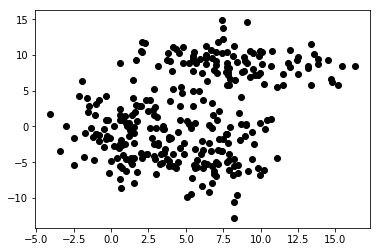

In [1]:
"""K-means Clustering
    1. Set K
    2. Clustering
    3. Updating : based on result of 2nd stage"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generating data
obs = 300     
data = []
# Gaussian -> 3 diff. dist. by dispersion
for i in range(obs):
    choice = np.random.random()
    if choice < 1/3:
        x = np.random.normal(1.0,2.0)
        y = np.random.normal(-1.0,3.5)
    elif choice < 2/3:
        x = np.random.normal(9.0, 4.0)
        y = np.random.normal(9.0, 2.0)
    else:
        x = np.random.normal(7.0, 2.0)
        y = np.random.normal(-3.0, 4.0)

    plt.plot(x, y, 'ko')        # ko = black dot
    data.append([x, y])

print("Data is generated!")
plt.show()

In [2]:
K=3

# constant tensor <- data
vectors = tf.constant(data)
# Randomly pick K centroids
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0, 0],[K, -1]))

In [3]:
print (vectors.get_shape())
print (centroids.get_shape())

(300, 2)
(3, 2)


In [5]:
# Comparing distance
# Dim. expansion
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

In [6]:
print (expanded_vectors.get_shape())
print (expanded_centroids.get_shape())

(1, 300, 2)
(3, 1, 2)


In [8]:
# Loss function = RMS of errors
loss = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)),2)
best_centroids = tf.argmin(loss, 0)

In [9]:
# Updating centroids
means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(best_centroids, c)),[1,-1])), reduction_indices=[1]) for c in range(K)], 0)
update_centroids = tf.assign(centroids, means)

In [10]:
# Run tf
# Initialise all vari.
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [11]:
# Training
for step in range(1):
    _ , centroid_values, assignment_values = sess.run([update_centroids, centroids, best_centroids])


Plotting is done!


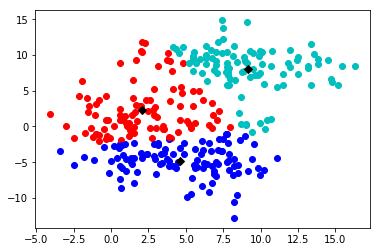

In [12]:
# Labelling data
for i in range(len(assignment_values)):
    if assignment_values[i] == 0:
        plt.plot(data[i][0],data[i][1], 'bo')
    elif assignment_values[i] == 1:
        plt.plot(data[i][0], data[i][1], 'ro')
    elif assignment_values[i] == 2:
        plt.plot(data[i][0], data[i][1], 'co')
    else:
        plt.plot(data[i][0], data[i][1], 'go')
        
plt.plot(centroid_values[:,0], centroid_values[:,1], 'kD')  

print("Plotting is done!")
plt.show()